In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [2]:
train_images,test_images=train_images/255, test_images/ 255

In [3]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
import matplotlib.pyplot as plt

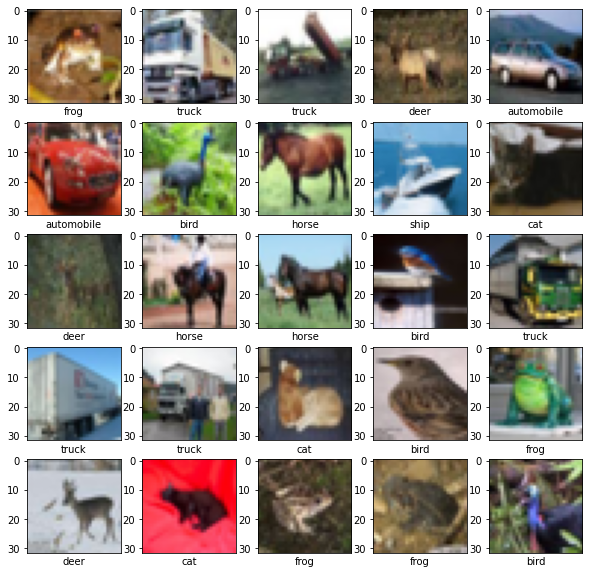

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])


In [13]:
train_images.shape

(50000, 32, 32, 3)

In [14]:
train_labels.shape

(50000, 1)

In [17]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))

In [20]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [21]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.7399 - accuracy: 0.3617 - val_loss: 1.3193 - val_accuracy: 0.5200
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1832 - accuracy: 0.5768 - val_loss: 1.0764 - val_accuracy: 0.6211
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0032 - accuracy: 0.6435 - val_loss: 0.9691 - val_accuracy: 0.6574
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8978 - accuracy: 0.6847 - val_loss: 0.9050 - val_accuracy: 0.6818
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8207 - accuracy: 0.7119 - val_loss: 0.9481 - val_accuracy: 0.6744
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7551 - accuracy: 0.7341 - val_loss: 0.8539 - val_accuracy: 0.7005
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6992 - accuracy: 0.7566 - val_loss: 0.8823 -

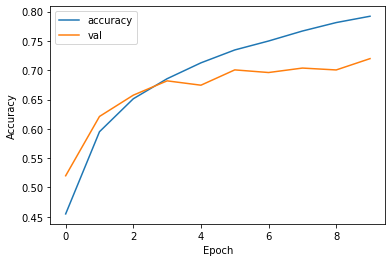

In [23]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()